# Testing GraphSearch Distance Concepts

## Load Libraries

In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.srex.ranking import Ranking
from utils.data_utils import DataUtils

## Initialize some variables

In [2]:
# Load Stop Words
stop_words_list = DataUtils.load_stopwords()

In [3]:
query                    = '"internet of things" OR iot'
#query                    = 'a!"#$"#"$"'
#query                     = 'query AND (expansion OR refinement)'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 20

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_query_terms  = True

In [4]:
ranking = Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)
ranking.calculate_ieee_xplore_ranking()
#ranking.calculate_article_dictionaries_list([{}])
#articles = ranking.get_ieee_xplore_ranking()
#dicts = [{"title": a.get('title', ''), "abstract": a.get('abstract', ''), "article_number": a.get('article_number', '')} for a in articles]
#import json
#print(json.dumps(dicts, indent=2))

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_query_terms, summarize)

In [8]:
for d in ranking.get_documents():
    print(f"TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

TITLE: Communication Protocol Stack for Constrained IoT Systems (id:8519904)
txt: communication protocol stack constrained iot system
txt: internet_thing iot gained huge popularity rapid advancement wide applicability real world application transformed life
txt: communication play integral role connecting iot device
txt: effective communication iot protocol offer lightweight secure reliable communication without compromising computational energy limitation employed constrained iot device need hour
txt: 
txt: paper insight various iot protocol applied different layer iot protocol suite analyze efficacy reliability protocol basis energy efficiency security lightweight nature protocol
TITLE: Internet of Things Security - Multilayered Method For End to End Data Communications Over Cellular Networks (id:8767227)
txt: internet_thing security multilayered method end end data communication cellular network
txt: aim paper put forth multilayered method securing data transport cellular connected 

In [9]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: Communication Protocol Stack for Constrained IoT Systems
vecinity matrix: {'communication': {'iot': [0, 0, 0, 1]}, 'protocol': {'iot': [0, 0, 1, 0]}, 'stack': {'iot': [0, 1, 0, 0]}, 'constrained': {'iot': [1, 0, 0, 0]}, 'system': {'iot': [1, 0, 0, 0]}}
vecinity matrix: {'internet_thing': {'iot': [1, 0, 0, 0]}, 'iot': {'internet_thing': [1, 0, 0, 0]}, 'gained': {'internet_thing': [0, 1, 0, 0], 'iot': [1, 0, 0, 0]}, 'huge': {'internet_thing': [0, 0, 1, 0], 'iot': [0, 1, 0, 0]}, 'popularity': {'internet_thing': [0, 0, 0, 1], 'iot': [0, 0, 1, 0]}, 'rapid': {'iot': [0, 0, 0, 1]}}
vecinity matrix: {'play': {'iot': [0, 0, 0, 1]}, 'integral': {'iot': [0, 0, 1, 0]}, 'role': {'iot': [0, 1, 0, 0]}, 'connecting': {'iot': [1, 0, 0, 0]}, 'device': {'iot': [1, 0, 0, 0]}}
vecinity matrix: {'effective': {'iot': [0, 1, 0, 0]}, 'communication': {'iot': [1, 0, 0, 0]}, 'protocol': {'iot': [1, 0, 0, 0]}, 'offer': {'iot': [0, 1, 0, 0]}, 'lightweight': {'iot': [0, 0, 1, 0]}, 'secure': {'iot': [0, 0, 0, 1

In [12]:
#Show graphs from the ranking class
print(ranking.get_document_by_ranking_position(20).get_graph())

SUBQUERY: internet_thing OR iot
TERM: system ; PONDERATION: 1.7 ; DISTANCE: 1.6
TERM: wide ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: range ; PONDERATION: 0.8 ; DISTANCE: 2.7
TERM: fast ; PONDERATION: 0.7 ; DISTANCE: 1.5
TERM: solution ; PONDERATION: 0.7 ; DISTANCE: 1.0
TERM: evolving ; PONDERATION: 0.7 ; DISTANCE: 2.5
TERM: technology ; PONDERATION: 0.7 ; DISTANCE: 3.5
TERM: complete ; PONDERATION: 0.7 ; DISTANCE: 1.5
TERM: based ; PONDERATION: 0.7 ; DISTANCE: 1.0
TERM: infrastructure ; PONDERATION: 0.3 ; DISTANCE: 2.0
TERM: localised ; PONDERATION: 0.3 ; DISTANCE: 3.0
TERM: deployment ; PONDERATION: 0.3 ; DISTANCE: 1.0
TERM: network ; PONDERATION: 0.3 ; DISTANCE: 1.0
TERM: regional ; PONDERATION: 0.3 ; DISTANCE: 4.0
TERM: internet_thing ; PONDERATION: 0.3 ; DISTANCE: 1.0
TERM: iot ; PONDERATION: 0.3 ; DISTANCE: 1.0
TERM: specifically ; PONDERATION: 0.3 ; DISTANCE: 1.0
TERM: designated ; PONDERATION: 0.3 ; DISTANCE: 2.0
TERM: negating ; PONDERATION: 0.3 ; DISTANCE: 3.0
TERM: medium ; PO

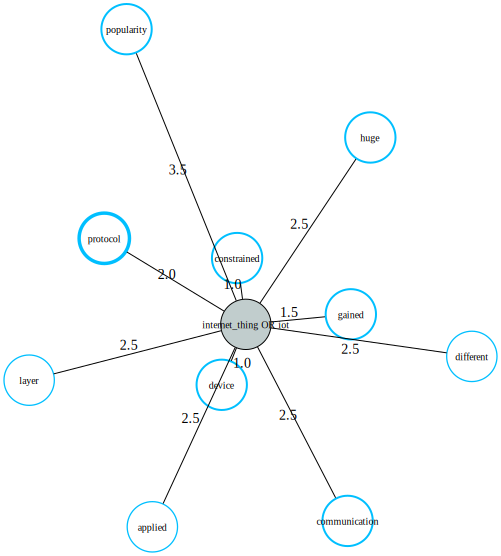

In [10]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

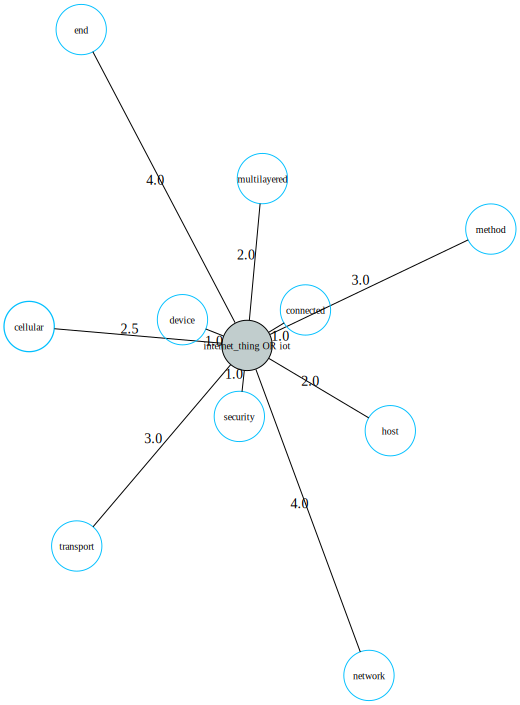

In [11]:
visual_graph2 = ranking.get_document_by_ranking_position(2).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

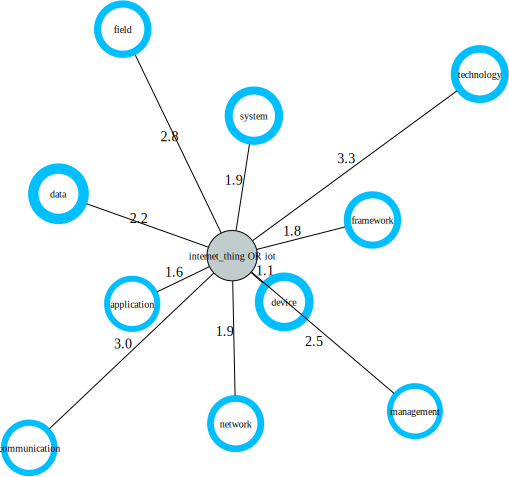

In [12]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [13]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(1).get_graph())

np.float64(0.34985968057421846)

In [6]:
# Top 2 sentence graphs by doc function
def get_top2_graph_sentences(doc, include_ponderation=False):
    g_user = ranking.get_graph()
    top2_graph_sentences = []
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():
            top2_graph_sentences.append((s.get_position_in_doc(), g_user.get_cosine_similarity(s.get_graph(), include_ponderation)))

    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0],top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(),doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    # return -> ((pos_in_doc_1, pos_in_doc_2), (graph1, graph2))
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Average similarities by document function
def avg_sim_doc(g_doc_top2_sentences, include_ponderation=False):
    graph_user = ranking.get_graph()
    sim_doc_top1 = graph_user.get_cosine_similarity(g_doc_top2_sentences[0], include_ponderation)
    sim_doc_top2 = graph_user.get_cosine_similarity(g_doc_top2_sentences[1], include_ponderation)
    avg_sim_doc = (sim_doc_top1 + sim_doc_top2) / 2
    return avg_sim_doc


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences = []
    avg_sim_docs = []

    for index1 in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_document_by_ranking_position(index1+1), include_ponderation))

    for index2 in range(nr_search_results):
        avg_sim_docs.append(avg_sim_doc(g_docs_top2_sentences[index2][1], include_ponderation))
        
    for index3 in range(nr_search_results):
        print(f"doc {index3+1} top 2 sentences: {g_docs_top2_sentences[index3][0]}")
        print(f"doc {index3+1} similarity: {avg_sim_docs[index3]}")
    


tple_doc1 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(1))
tple_doc2 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(10))
doc1_doc2_sentence_top1_union = tple_doc1[1][0].get_union_to_graph(tple_doc2[1][0])
doc1_doc2_sentence_top2_union = tple_doc1[1][1].get_union_to_graph(tple_doc2[1][1])

print(f"doc 1 top 1 sentence similarity: {tple_doc1[1][0].get_cosine_similarity(doc1_doc2_sentence_top1_union)}")
print(f"doc 10 top 1 sentence similarity: {tple_doc2[1][0].get_cosine_similarity(doc1_doc2_sentence_top1_union)}")

print(f"\ndoc 1 top 2 sentence similarity: {tple_doc1[1][1].get_cosine_similarity(doc1_doc2_sentence_top2_union)}")
print(f"doc 10 top 2 sentence similarity: {tple_doc2[1][1].get_cosine_similarity(doc1_doc2_sentence_top2_union)}")

print("\nSimilarity without include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)

doc 1 top 1 sentence similarity: 0.7538868109610403
doc 10 top 1 sentence similarity: 0.6570043198176042

doc 1 top 2 sentence similarity: 0.8243704041918861
doc 10 top 2 sentence similarity: 0.5660507368536026

Similarity without include_ponderations
doc 1 top 2 sentences: (3, 5)
doc 1 similarity: 0.19375411370446827
doc 2 top 2 sentences: (0, 1)
doc 2 similarity: 0.12123697601332689
doc 3 top 2 sentences: (5, 2)
doc 3 similarity: 0.21054213772889702
doc 4 top 2 sentences: (0, 1)
doc 4 similarity: 0.12212497040612841
doc 5 top 2 sentences: (6, 5)
doc 5 similarity: 0.13162976087916847
doc 6 top 2 sentences: (1, 0)
doc 6 similarity: 0.1588915361395461
doc 7 top 2 sentences: (1, 0)
doc 7 similarity: 0.1588915361395461
doc 8 top 2 sentences: (7, 1)
doc 8 similarity: 0.16596241739182807
doc 9 top 2 sentences: (0, 4)
doc 9 similarity: 0.14119754348103813
doc 10 top 2 sentences: (1, 0)
doc 10 similarity: 0.10920431417047333
doc 11 top 2 sentences: (1, 0)
doc 11 similarity: 0.1238959944322454

In [7]:
def print_documents_similatity(include_ponderation: bool = False):
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1}: {ranking.get_graph().get_cosine_similarity(doc.get_graph(), include_ponderation)}")

print("Similarities by document without include_ponderations")
print_documents_similatity(include_ponderation=False)

print("\nSimilarities by document without include_ponderations")
print_documents_similatity(include_ponderation=True)

Similarities by document without include_ponderations
doc 1: 0.3408868649861658
doc 2: 0.16930190058582179
doc 3: 0.3494147983006435
doc 4: 0.1605230834384342
doc 5: 0.23637314873595575
doc 6: 0.25353808175053466
doc 7: 0.25353808175053466
doc 8: 0.3654172566670425
doc 9: 0.21818448177667266
doc 10: 0.14760396350759766
doc 11: 0.1708423982396492
doc 12: 0.18050215612806625
doc 13: 0.22867392525422015
doc 14: 0.28367073783124946
doc 15: 0.22678833968001372
doc 16: 0.22678833968001372
doc 17: 0.22678833968001372
doc 18: 0.30791080164073875
doc 19: 0.27736796100538885
doc 20: 0.36680389831717763

Similarities by document without include_ponderations
doc 1: 0.302564321701362
doc 2: 0.2501508318060914
doc 3: 0.5021312179957272
doc 4: 0.23898224129790996
doc 5: 0.25990284555023535
doc 6: 0.4885081076138207
doc 7: 0.4885081076138208
doc 8: 0.4955887724865498
doc 9: 0.2211608740695459
doc 10: 0.2976939532452988
doc 11: 0.14113954890832148
doc 12: 0.1744416955059602
doc 13: 0.24048085293163915
